In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Import Data

In [2]:
# Load data
df_control = pd.read_csv('control_group.csv', sep= ';')
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load data
df_test = pd.read_csv('test_group.csv', sep= ';')
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
# Replace column name
df_control.columns = ['campaign_name', 'date', 'spend','impressions', 
                      'reach', 'website_clicks','searches','view_content',
                        'add_to_cart','purchase']
df_test.columns = ['campaign_name', 'date', 'spend','impressions',
                      'reach', 'website_clicks','searches','view_content',
                        'add_to_cart','purchase']

## Data Cleaning

In [5]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   30 non-null     object 
 1   date            30 non-null     object 
 2   spend           30 non-null     int64  
 3   impressions     29 non-null     float64
 4   reach           29 non-null     float64
 5   website_clicks  29 non-null     float64
 6   searches        29 non-null     float64
 7   view_content    29 non-null     float64
 8   add_to_cart     29 non-null     float64
 9   purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_name   30 non-null     object
 1   date            30 non-null     object
 2   spend           30 non-null     int64 
 3   impressions     30 non-null     int64 
 4   reach           30 non-null     int64 
 5   website_clicks  30 non-null     int64 
 6   searches        30 non-null     int64 
 7   view_content    30 non-null     int64 
 8   add_to_cart     30 non-null     int64 
 9   purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [7]:
# check missing value
df_control.isnull().sum()

campaign_name     0
date              0
spend             0
impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchase          1
dtype: int64

In [8]:
# handling missing value
df_control['impressions'].fillna(df_control['impressions'].median(), inplace=True)
df_control['reach'].fillna(df_control['reach'].median(), inplace=True)
df_control['website_clicks'].fillna(df_control['website_clicks'].median(), inplace=True)
df_control['searches'].fillna(df_control['searches'].median(), inplace=True)
df_control['view_content'].fillna(df_control['view_content'].median(), inplace=True)
df_control['add_to_cart'].fillna(df_control['add_to_cart'].median(), inplace=True)
df_control['purchase'].fillna(df_control['purchase'].median(), inplace=True)

In [9]:
# check missing value
df_control.isnull().sum()

campaign_name     0
date              0
spend             0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

In [10]:
# check missing value
df_test.isnull().sum()

campaign_name     0
date              0
spend             0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

In [11]:
# Check duplicates
df_control.duplicated().sum()

0

In [12]:
# Check duplicates
df_test.duplicated().sum()

0

In [18]:
# Merge dataset
df = pd.concat([df_control, df_test], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   60 non-null     object 
 1   date            60 non-null     object 
 2   spend           60 non-null     int64  
 3   impressions     60 non-null     float64
 4   reach           60 non-null     float64
 5   website_clicks  60 non-null     float64
 6   searches        60 non-null     float64
 7   view_content    60 non-null     float64
 8   add_to_cart     60 non-null     float64
 9   purchase        60 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


## Exploratory Data Analysis

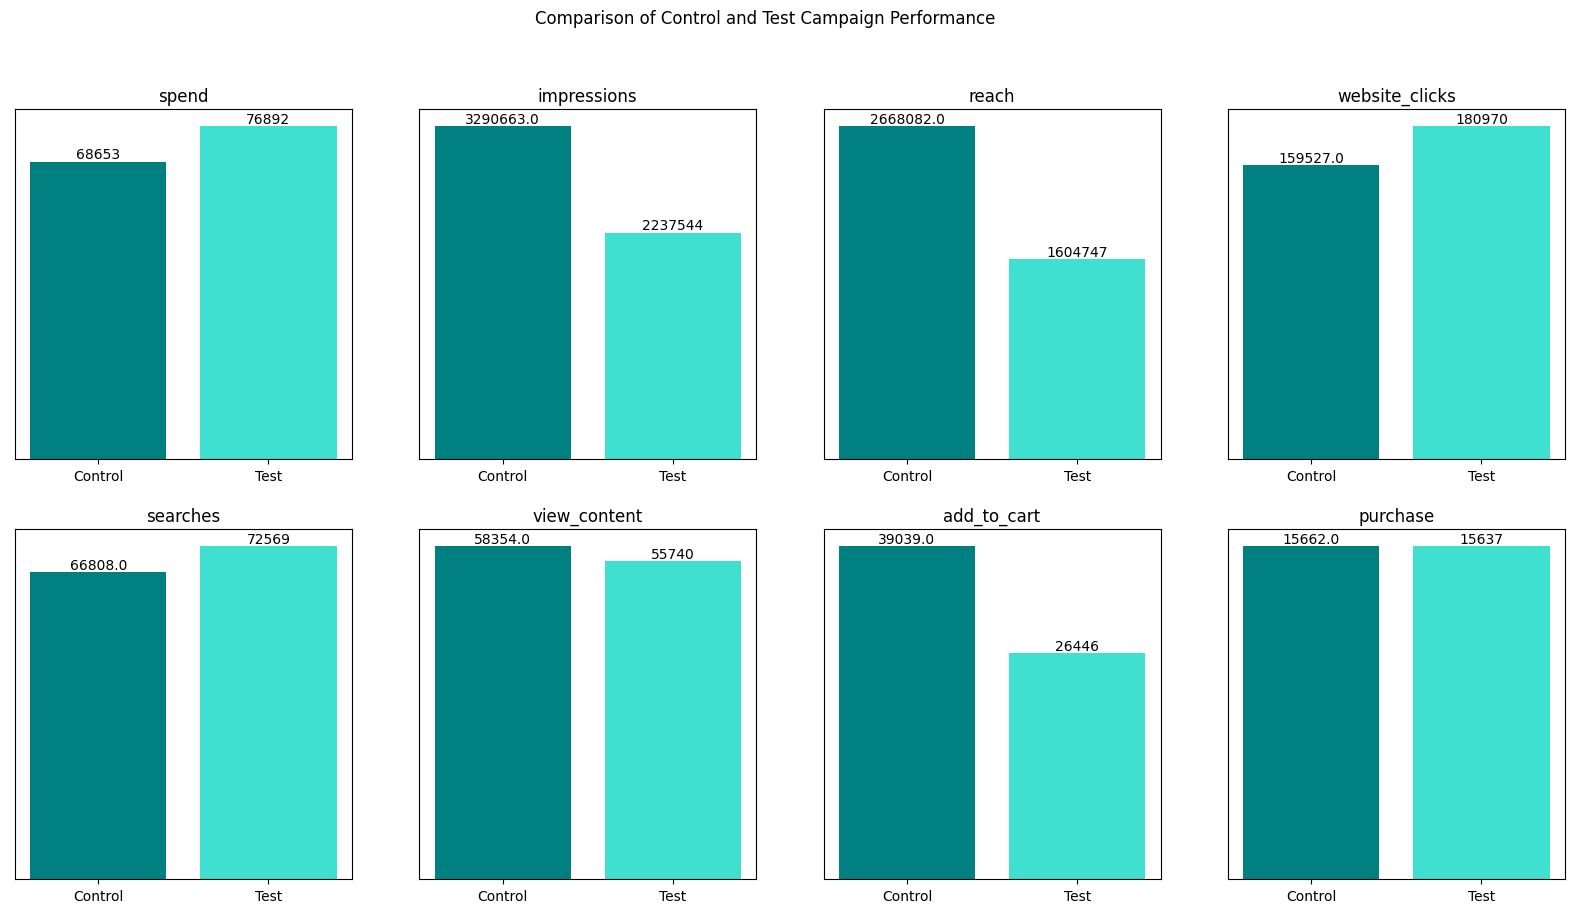

In [15]:
# Displayed Columns
categories = ['spend', 'impressions', 'reach', 'website_clicks', 'searches', 'view_content', 'add_to_cart', 'purchase']

# Subplot Configuration
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Comparison of Control and Test Campaign Performance')

for i, category in enumerate(categories):
    row = i // 4
    col = i % 4

    # Plot bar chart
    bars = axes[row, col].bar(['Control', 'Test'], [df_control[category].sum(), df_test[category].sum()], color=['teal', 'turquoise'])
    axes[row, col].set_title(category)
    axes[row, col].set_ylabel('Values')

    # Add label to each bar
    for bar, label in zip(bars, [f'{val}' for val in [df_control[category].sum(), df_test[category].sum()]]):
        axes[row, col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label,
                            ha='center', va='bottom')

    # Hide the y-axis
    axes[row, col].get_yaxis().set_visible(False)

# Show the plot
plt.show()

## Calculate Metrics

In [20]:
# Calculate CTR, Conversion Rate, CPC
df['CTR'] = (df['website_clicks'] / df['impressions']) * 100
df['Conversion_rate'] = (df['purchase'] / df['website_clicks']) * 100
df['CPC'] = (df['spend'] / df['website_clicks']) * 100

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    60 non-null     object 
 1   date             60 non-null     object 
 2   spend            60 non-null     int64  
 3   impressions      60 non-null     float64
 4   reach            60 non-null     float64
 5   website_clicks   60 non-null     float64
 6   searches         60 non-null     float64
 7   view_content     60 non-null     float64
 8   add_to_cart      60 non-null     float64
 9   purchase         60 non-null     float64
 10  CTR              60 non-null     float64
 11  Conversion_rate  60 non-null     float64
 12  CPC              60 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 6.2+ KB


Visualize 

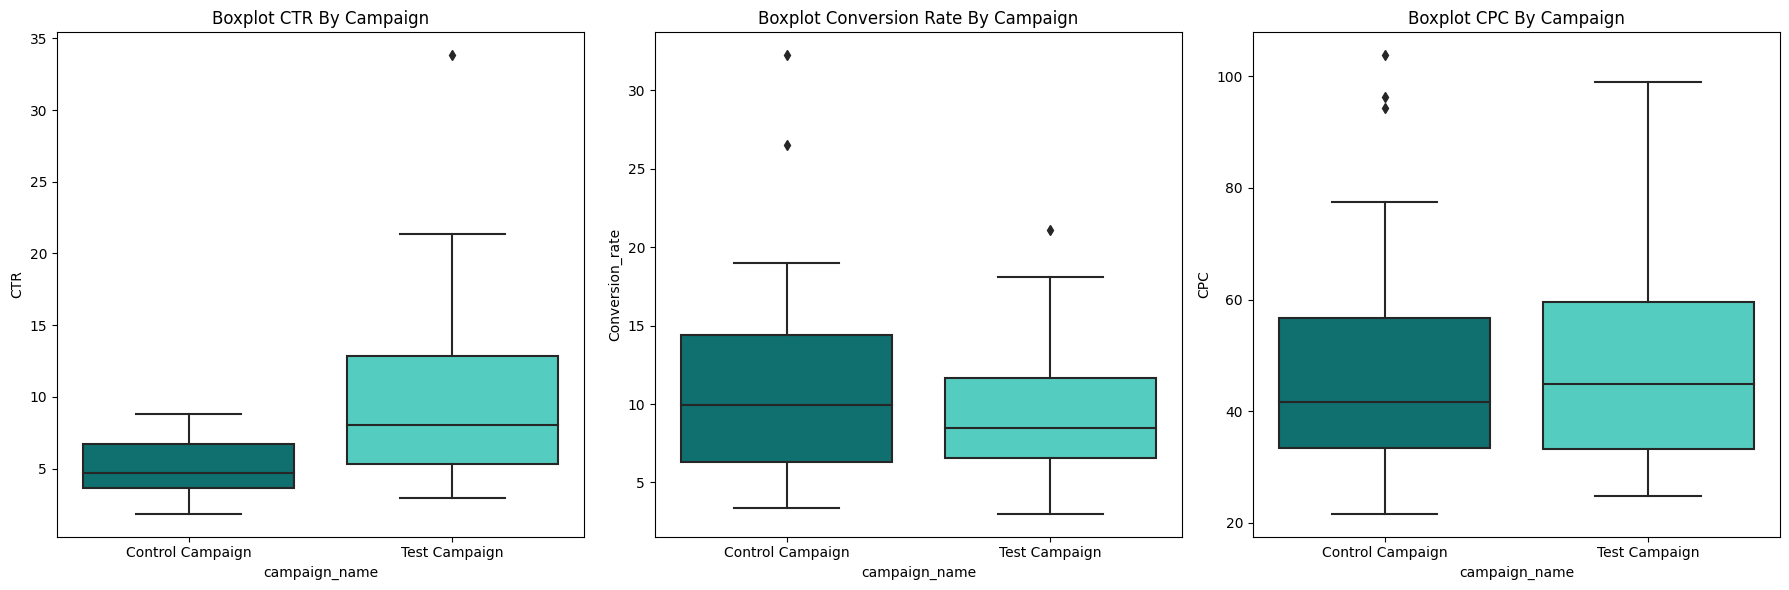

In [41]:
# Visualize Boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# CTR Boxplot
sns.boxplot(ax = axes[0], x='campaign_name', y='CTR', data=df, palette={'Control Campaign': 'teal', 'Test Campaign': 'turquoise'})
axes[0].set_title('Boxplot CTR By Campaign')

# Conversion Rate Boxplot
sns.boxplot(ax = axes[1], x='campaign_name', y='Conversion_rate', data=df, palette={'Control Campaign': 'teal', 'Test Campaign': 'turquoise'})
axes[1].set_title('Boxplot Conversion Rate By Campaign')

# CPC Boxplot 
sns.boxplot(ax = axes[2], x='campaign_name', y='CPC', data=df, palette={'Control Campaign': 'teal', 'Test Campaign': 'turquoise'})
axes[2].set_title('Boxplot CPC By Campaign')

plt.tight_layout()
plt.show()

## Hypothesis Testing

### Define Null and Alternative Hypothesis

1. Rata-rata CTR test campaign lebih tinggi dari control campaign 
   - Hipotesis:
   
     H0: μ1=μ2 (rata-rata CTR test campaign sama dengan CTR control campaign)
     
     H1: μ1>μ2 (rata-rata CTR test campaign lebih besar dari CTR control campaign)
   - Taraf Signifikan:
   
      α = 0,05

2. Rata-rata Conversion rate test campaign lebih tinggi dari control campaign 
   - Hipotesis:
   
     H0: μ1=μ2 (rata-rata Conversion rate test campaign  sama dengan Conversion rate control campaign)
     
     H1: μ1>μ2 (rata-rata Conversion rate test campaign lebih besar dari Conversion rate control campaign)
   - Taraf Signifikan:
   
      α = 0,05

3. Rata-rata CPC test campaign lebih rendah dari control campaign
   - Hipotesis:
   
     H0: μ1=μ2 (rata-rata CPC test campaign  sama dengan CPC control campaign)
     
     H1: μ1<μ2 (rata-rata CPC test campaign lebih rendah dari CPC control campaign)
   - Taraf Signifikan:
   
      α = 0,05

### Determine the statistical test and calculate

Melakukan F test untuk menentukan t-test dengan varian sama atau tidak sama

In [22]:
# Split control campaign and test campaign
data_control = df[df['campaign_name'] == 'Control Campaign']
data_test = df[df['campaign_name'] == 'Test Campaign']

#### F-Test

In [26]:
import scipy.stats

# Define F-test function
def f_test(control, test, metric_name):
    # 1. Set Significant Level
    alpha = 0.05

    # Transform data to np array
    control_data = np.array(control[metric_name])
    test_data = np.array(test[metric_name])

    # calculate F test statistics
    f = np.var(control_data, ddof=1) / np.var(test_data, ddof=1)

    # Define degree of freedom
    dfn = control_data.size - 1  # numerator
    dfd = test_data.size - 1  # denominator

    # Calculate p-value & f_crit of F test statistics
    p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
    f_crit = scipy.stats.f.ppf(1 - alpha, dfn, dfd)

    # Return results as a dictionary
    results = {
        "F-statistic value": f,
        "F-critical value": f_crit,
        "P-value": p
    }

    return results

In [27]:
# CTR
ctr_results = f_test(data_control, data_test, 'CTR')
print("CTR (Click-Through Rate):")
print(f"F-statistic value: {ctr_results['F-statistic value']:.3f}")
print(f"F-critical value: {ctr_results['F-critical value']:.3f}")
print(f"P-value: {ctr_results['P-value']:.3f}\n")

CTR (Click-Through Rate):
F-statistic value: 0.089
F-critical value: 1.861
P-value: 1.000



F-statistic < F-critical dan p-value > α, menunjukkan bahwa varians 'CTR' antara dua campaign sama.

In [28]:
# Conversion Rate
conversion_rate_results = f_test(data_control, data_test, 'Conversion_rate')
print("Conversion Rate:")
print(f"F-statistic value: {conversion_rate_results['F-statistic value']:.3f}")
print(f"F-critical value: {conversion_rate_results['F-critical value']:.3f}")
print(f"P-value: {conversion_rate_results['P-value']:.3f}\n")

Conversion Rate:
F-statistic value: 2.287
F-critical value: 1.861
P-value: 0.015



F-statistic > F-critical dan p-value < α menunjukkan bahwa varians 'Conversion_rate' antara dua campaign tidak sama.

In [29]:
# CPC
cpc_results = f_test(data_control, data_test, 'CPC')
print("CPC (Cost Per Click):")
print(f"F-statistic value: {cpc_results['F-statistic value']:.3f}")
print(f"F-critical value: {cpc_results['F-critical value']:.3f}")
print(f"P-value: {cpc_results['P-value']:.3f}")

CPC (Cost Per Click):
F-statistic value: 1.501
F-critical value: 1.861
P-value: 0.140


F-statistic < F-critical dan p-value > α, menunjukkan bahwa varians 'CPC' antara dua campaign sama.

selanjutnya, t-test dilakukan mengacu pada hasil f-test

#### T-test

1. Rata-rata CTR test campaign lebih tinggi dari control campaign 

In [36]:
# T-test Equal Variance
from scipy import stats
result = scipy.stats.ttest_ind(data_test['CTR'],
                                data_control['CTR'],
                                equal_var=True,
                                alternative="greater")

# calculate t-critical (CTR)
alpha = 0.05
df = len(data_test['CTR'])+len(data_control['CTR'])-2  #df=n1+n2-2
t_critical = stats.t.ppf(1 - alpha, df)

print("CTR:")
print(f"T-statistic: {result.statistic:.3f}")
print(f"t-Critical : {t_critical:.3f}")
print(f"P-value: {result.pvalue:.4f}")

CTR:
T-statistic: 4.002
t-Critical : 1.672
P-value: 0.0001


2. Rata-rata Conversion rate test campaign lebih tinggi dari control campaign 

In [37]:
# T-test Unequal Variance
result = scipy.stats.ttest_ind(data_test['Conversion_rate'],
                                data_control['Conversion_rate'],
                                equal_var=False,
                                alternative="greater")

# calculate t-critical
alpha = 0.05
df = len(data_test['Conversion_rate'])+len(data_control['Conversion_rate'])-2  #df=n1+n2-2
t_critical = stats.t.ppf(1 - alpha, df)

print("Conversion Rate:")
print(f"T-statistic: {result.statistic:.3f}")
print(f"t-Critical : {t_critical:.3f}")
print(f"P-value: {result.pvalue:.3f}")

Conversion Rate:
T-statistic: -1.482
t-Critical : 1.672
P-value: 0.928


3. Rata-rata CPC test campaign lebih rendah dari control campaign

In [38]:
# T-test equal Variance
result = scipy.stats.ttest_ind(data_test['CPC'],
                                data_control['CPC'],
                                equal_var=True,
                                alternative="less")

# calculate t-critical (CPC)
alpha = 0.05
df = len(data_test['CPC'])+len(data_control['CPC'])-2  #df=n1+n2-2
t_critical = stats.t.ppf(1 - alpha, df)

print("CPC:")
print(f"T-statistic: {result.statistic:.3f}")
print(f"t-Critical : {t_critical:.3f}")
print(f"P-value: {result.pvalue:.3f}")

CPC:
T-statistic: -0.415
t-Critical : 1.672
P-value: 0.340


Kesimpulan: 
1. CTR
t-statistic > t-critical dan p-value < α maka tolak hipotesis null atau dengan tingkat keyakinan 95% terdapat cukup bukti bahwa rata-rata CTR test campaign lebih tinggi dibandingkan control campaign.
2. Conversion Rate
t-statistic < t-critical dan p-value > α maka gagal tolak hipotesis null atau dengan tingkat keyakinan 95% tidak terdapat cukup bukti bahwa rata-rata conversion rate test campaign lebih tinggi dibandingkan control campaign.
3. CPC < t-critical dan p-value > α maka gagal tolak hipotesis null atau dengan tingkat keyakinan 95% tidak terdapat cukup bukti bahwa rata-rata CPC test campaign lebih tinggi dibandingkan control campaign.

#### Confidence Interval



In [46]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

# Calculate Confidence Interval
cm = CompareMeans(d1=DescrStatsW(data=data_test['CTR']),
                  d2=DescrStatsW(data=data_control['CTR']))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='pooled')

# Round the values to three decimal places
lower = round(lower, 3)
upper = round(upper, 3)

print("Confidence Interval for CTR:", "[", lower, upper, "]")

Confidence Interval for CTR: [ 2.581 7.745 ]


In [45]:
# Calculate Confidence Interval
cm = CompareMeans(d1=DescrStatsW(data=data_test['Conversion_rate']),
                  d2=DescrStatsW(data=data_control['Conversion_rate']))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

# Round the values to three decimal places
lower = round(lower, 3)
upper = round(upper, 3)

print("Confidence Interval for Conversion rate:", "[", lower, upper, "]")

Confidence Interval for Conversion rate: [ -5.141 0.774 ]


In [47]:
# Calculate Confidence Interval
cm = CompareMeans(d1=DescrStatsW(data=data_test['CPC']),
                  d2=DescrStatsW(data=data_control['CPC']))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='pooled')

# Round the values to three decimal places
lower = round(lower, 3)
upper = round(upper, 3)

print("Confidence Interval for CPC:", "[", lower, upper, "]")

Confidence Interval for CPC: [ -12.46 8.18 ]
